# Ejercicio 1
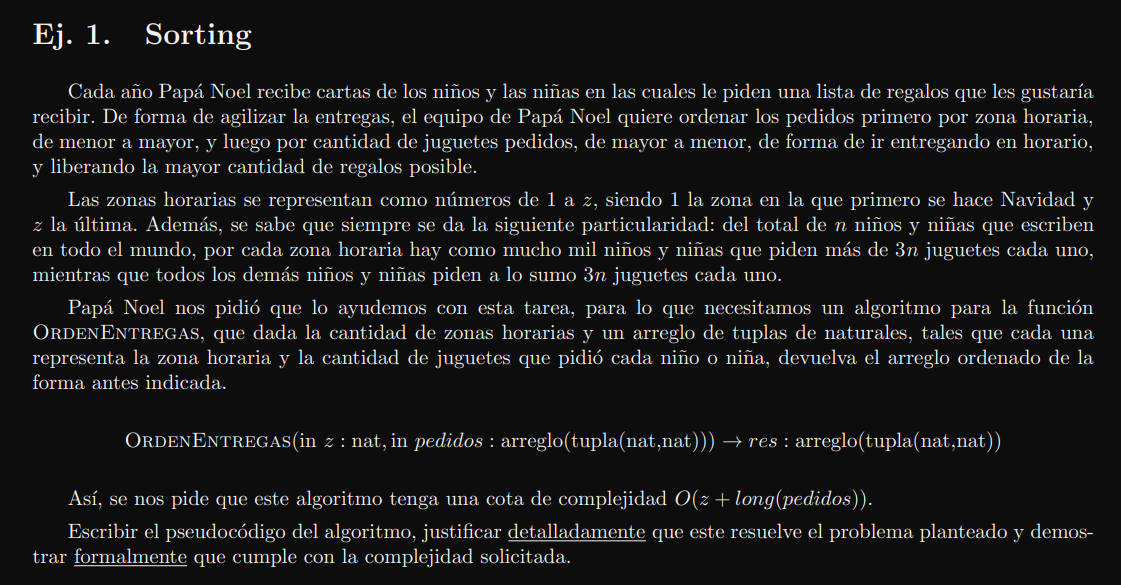

```
La idea es que por cada zona horaria se tiene a lo sumo 1000 tuplas con cantidad de regalos mayor a 3n. Entonces por cada zona tendre 2 listas:
 Una para ordenar estos 1000 elementos con insertion: O(#elem^2)
Pero como #elem <= 1000 =>  queda O(1)
 Otra para ordenar con counting ya que el valor de la tupla que refiere a la cant de regalos esta acotada por 3.n

 OrdenEntregas(in z:nat, in pedidos:arreglo(tupla(nat,nat)))-> res:arreglo(tupla(nat,nat))
  porZona <- arreglo[1...z] de (lista(tupla(nat,nat),lista(tupla(nat,nat))   
  n <- tam(pedidos)  
  for i<-1 ... z do
    zonaIAcotada <- vacia()
    zonaINoAcotada <- vacia()
    porZona[i] <- <zonaIAcotada,zonaINoAcotada>
  endfor

  for i<-1..n do
    k <- pi_1(pedidos[i])
    listaDeZona <- porZona[k]
    if pi_2(pedidos[i]) >3.n then
      agregarAtras(pi_2(listaDeZona),pedidos[i])
    else
      agregarAtras(pi_1(listaDeZona),pedidos[i])
    endif
  endfor

  resConAcotados <- vacia()
  //Ordenamos los no acotados
  for i<-1 ... z do
    insertionSort(pi_2(porZona[i]))
    concatenar(resConAcotados,pi_1(porZona[i]))
  endfor

  countingSort(resConAcotados)
  l <- 1
  i<- 1
  while i< z  do
    while(l<n & pi_1(resConAcotados[l]) == pi_2(resConAcotados[l+1])) do
      l++
    endwhile
    concatenarEn(resConAcotados,l,pi_2(porZona[i]))
    l <- l + tam(pi_2(porZona[i]))
    i++
  endwhile

  return resConAcotados

```

### Funciones auxiliares

In [72]:
import random
def imprimir_lista_vertical(lista):
    """Para visualizar mejor una lista de elementos al tener un cardical elevado"""
    print("[\n")
    for elemento in lista:
        print(elemento)
    print("\n]")

def generar_lista_tuplas_menores_a(n, z):
    """Genera una lista de tuplas:
    Primera componente menor a z
    Segunda componente menores a 3*n
    """
    lista_tuplas = []
    # Generar elementos menores o iguales a 3*n
    for i in range(n):
        primera_componente = i % z  # Acotar la primera componente por z
        segunda_componente = random.randint(1, 3 * n)  # Valor menor o igual a 3*n
        tupla = (primera_componente, segunda_componente)
        lista_tuplas.append(tupla)
    random.shuffle(lista_tuplas)
    return lista_tuplas

def generar_lista_tuplas(n, z):
    """
    Genera una lista de tuplas:
     Primera componente menor a z
     Al menos por cada z hay a lo sumo 1000 elementos con
      Segunda componente mayores a 3*n
     El resto con
      Segunda componente menor a 3*n
    """
    lista_tuplas = []
    k_elementos_mayores_a = random.randint(1, 1000)
    elementos_mayores = min(k_elementos_mayores_a, n)  # Limitar a lo sumo 1000 elementos mayores a 3*n
    elementos_menores = n - elementos_mayores  # Resto de elementos con valor menor o igual a 3*n

    # Generar elementos mayores a 3*n
    for i in range(elementos_mayores):
        primera_componente = i % z  # Acotar la primera componente por z
        segunda_componente = random.randint(3 * n + 1, 1000000)  # Valor mayor a 3*n
        tupla = (primera_componente, segunda_componente)
        lista_tuplas.append(tupla)

    # Generar elementos menores o iguales a 3*n
    for i in range(elementos_menores):
        primera_componente = i % z  # Acotar la primera componente por z
        segunda_componente = random.randint(1, 3 * n)  # Valor menor o igual a 3*n
        tupla = (primera_componente, segunda_componente)
        lista_tuplas.append(tupla)

    random.shuffle(lista_tuplas)
    return lista_tuplas

def contar_tuplas(lista_tuplas):
    """
    Dada una lista de tuplas menciona cuantas tuplas en su
    segunda componente son mayores a 3*n y
    cuantas menores
    """
    n = len(lista_tuplas)
    count_menor = 0
    count_mayor = 0

    for tupla in lista_tuplas:
        segunda_componente = tupla[1]
        if segunda_componente < 3 * n:
            count_menor += 1
        else:
            count_mayor += 1
    print("Numero de tuplas en l1 con cant de regalos menores a 3*n:",count_menor)
    print("Numero de tuplas en l1 con cant de regalos mayores a 3*n:",count_mayor)
    return count_menor, count_mayor



## Algoritmos

### Algoritmos de ordenamiento

In [71]:
def counting_sort_tuples(tuples_list,z):
    # Encontrar el rango de valores
    max_value = max(tuples_list, key=lambda x: x[1])[1]
    range_values = max_value + 1

    # Inicializar el arreglo de conteo
    count = [[0] * range_values for _ in range(z)]

    # Contar la frecuencia de los valores
    for tuple_value in tuples_list:
        count[tuple_value[0]][tuple_value[1]] += 1

    i = 0
    x = 0
    sorted_list = [None] * len(tuples_list)
    for k in range(z):
      for x in range(max_value,-1,-1):
        for t in range(count[k][x]):
          sorted_list[i] = (k,x)
          i += 1
    return sorted_list

def Insertion_sort_by_second_element(tuples_list): #Ordenar por cantidad de regalos de mayor a menor
    tuples_list.sort(key=lambda x: x[1], reverse=True)


### Algoritmo principal

In [ ]:

def OrdenEntregas(z,pedidos):
  n = len(pedidos)
  porZona = []
  for i in range(z):
    zonaIAcotada = []
    zonaINoAcotada = []
    porZona.append((zonaIAcotada,zonaINoAcotada))

  for i in range(n):
    k = pedidos[i][0] #Accedo a la zona
    if pedidos[i][1] > 3*n:
      porZona[k][1].append(pedidos[i])
    else:
      porZona[k][0].append(pedidos[i])

  res = []

  #Ordenamos los no acotados
  for i in range(z):
    Insertion_sort_by_second_element(porZona[i][1])   #O(1) pues la maxima cant de elementos es 1000
    res += porZona[i][0]         #Aun no ordenamos solo armamos un arreglo con num de regalos < 3n

  res = counting_sort_tuples(res,z)

  i = 1
  res[0:0] = porZona[0][1]
  l = len(porZona[0][1]) + 1
  while i < z:
    while l<n-1 and res[l][0] == res[l+1][0] :
      l += 1
    res[l+1:l+1] = porZona[i][1]
    l += len(porZona[i][1]) + 1
    i += 1

  return res


### Testeo

In [92]:
n=500
z=3
l1 = generar_lista_tuplas(n,z)
conteo = contar_tuplas(l1)

Numero de tuplas en l1 con cant de regalos menores a 3*n: 215
Numero de tuplas en l1 con cant de regalos mayores a 3*n: 285


In [93]:
res = OrdenEntregas(z,l1)
imprimir_lista_vertical(res)

[

(0, 993938)
(0, 979326)
(0, 978119)
(0, 967783)
(0, 959985)
(0, 958166)
(0, 956978)
(0, 954355)
(0, 950771)
(0, 941087)
(0, 940296)
(0, 937622)
(0, 924404)
(0, 919127)
(0, 910770)
(0, 902891)
(0, 888164)
(0, 859013)
(0, 843014)
(0, 842580)
(0, 809969)
(0, 792550)
(0, 759827)
(0, 753450)
(0, 750276)
(0, 739464)
(0, 710786)
(0, 699829)
(0, 684220)
(0, 678400)
(0, 655894)
(0, 649217)
(0, 633641)
(0, 629889)
(0, 623941)
(0, 616514)
(0, 609646)
(0, 600890)
(0, 592089)
(0, 588709)
(0, 582242)
(0, 581054)
(0, 568115)
(0, 562224)
(0, 556532)
(0, 544277)
(0, 537428)
(0, 534881)
(0, 520692)
(0, 513257)
(0, 512910)
(0, 511959)
(0, 505789)
(0, 480416)
(0, 478729)
(0, 461653)
(0, 461567)
(0, 458383)
(0, 458043)
(0, 457076)
(0, 452955)
(0, 434438)
(0, 430133)
(0, 419496)
(0, 402504)
(0, 378888)
(0, 346126)
(0, 326349)
(0, 326158)
(0, 325227)
(0, 301980)
(0, 280261)
(0, 271225)
(0, 247682)
(0, 245296)
(0, 237073)
(0, 234138)
(0, 213339)
(0, 208081)
(0, 194510)
(0, 169125)
(0, 165944)
(0, 163552)
(